Student name: Lia Kapanadze

Student pace: part time

Scheduled project review date/time: 4/12/19

Instructor name: Brandon Lewis

Blog post URL:https://medium.com/@likunak/sanity-checking-data-460637c556ce

##### Project Summary

* Step 0: Import and Display Raw Data

* Step 1: Clean Up Data

* Step 2: Explore and Further Clean Up

* Step 3: Determine Hypotheses (Business Questions)

* Step 4: Develop the Model

* Step 5: Interpret the Output

* Further improvements for the future:
    - refine the model
    - cross validation

## Step 0: Import and Display Raw Data
* import the csv file
* take a look at the content, size, and quick statistics of the variables and values included
* come up with a plan to clean the data

In [71]:
#import all necessary libraries
import pandas as pd #to read csv files and work with dataframes
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
#import data file
df = pd.read_csv('kc_house_data.csv')
print("we just imported a file with " +str(len(df))+" rows")
df.head()

we just imported a file with 21597 rows


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Below is the overview of its contents

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Below is the summary of values for each variable/column

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Let's also take a quick look at the first five rows of the dataframe

**Immediate Observations:**
* it includes data about apartment/house prices in 98 zip code (king county Washington)
* for each sale, we have unique id (id), sale date (date), and other variables paired up with our dependent variale - house price (price)
* variables come in differet data types - continuous (price, sqft_X, yr_built, yr_renovated, lat, long), categorical(bedrooms, bathrooms, floors, waterfront, view, zipcode), and other(date, id)
* I have 21,597 rows and 21 columns

## **Step 1: Clean Up Data**

I want to find and fix: null values, typos, values stored as wrong data types, duplicates (just to ID)
1. Null values
    - waterfront: one thought is that null values means it was an inland location and waterfront availability wasn't applicable, but I want to be risk-averse and include these values instead
    - view: again, don't want to make wront assumptions and the number of row is even lower, so I will drop
    - yr_renovated: I believe it's safe to assume all of these null-values mean that the house was not renovated so the last "renovation" was the same as yr_built
2. Data Types
    - sqft_basement is stored as an object instead of int or float
    - will have to change data type to numeric
    - if not possible I'll look for typos and fix, then change data type
3. Outliers
    - bedroom max is 33, need to ID anything above 5 bedrooms and check for errors
    - prices seem to have big delta between min and max, but it's sensible given the variety of properties sold
    - sqft_lot min and max very different
    - need to know what 3.5 floors means
4. Duplicates
    - Need to see if I have data on multiple sales for a single property
    - This may be useful somehow, but at this point I'm not 100% sure how
5. Convert Values Affected by Size
    - this part is a little bit jumping ahead on avoiding multicolinearity, will keep updating as I work through the project
    - the bigger the house, larger the floor 0 aka basement, so better to use a dummy instead

**1.1 Null Values**

In [73]:
#I created a new column yr_renovated_2 and filled it in with renovation years where available and built years where not
#I chose to have an additional column instead of overwriting yr_renovated for clarity
for i in range(0,len(df)):
    if df.at[i,'yr_renovated'] > 10:
        df.loc[i:i,'yr_renovated_2'] = df.at[i, 'yr_renovated']
    else:
        df.loc[i:i,'yr_renovated_2'] = df.at[i, 'yr_built']
    
#dropped all rows with view=nan
df = df.dropna(subset = ['view'])
#dropped all rows with waterfront=nan
df= df.dropna(subset = ['waterfront'])

Since I only left yr_renovated in for reference, we shouldn't care that it has some null values in for now


**1.2 Data Types**

In [74]:
#dropped all rows with sqft_basement =?
df= df.drop(df[df.sqft_basement == '?'].index)
#turned sqft_basement into numeric type
df['sqft_basement']= pd.to_numeric(df['sqft_basement'])
#as I have built, renovation, or renovation_2 years now, they are categorical rather than holding any continuous value; what I
#want to do is to measure the age of most recent renovation (how new/outdated is the paint on walls?)
#I will make a column called renovation to measure this
df['renovation'] = 2019 - df['yr_renovated_2']

df['zip_means'] = df.zipcode.map(df.groupby('zipcode')['price'].mean())

In [75]:
# I want to create simpler categorical variables from date and zicode
spring = ['3/','4/','5/']
summer = ['6/','7/','8/']
fall = ['9/','10','11']
def season(x):
    if x[0:2] in spring :
        return 1 # spring
    elif x[0:2] in summer:
        return 2 # summer
    elif x[0:2] in fall:
        return 3 # fall
    else:
        return 4 # winter

df["season"] = df["date"].map(lambda x: season(x))

df['neighborhood'] = df['zipcode'].map(lambda x: str(x)[0:4]) # gives me 19 variables instead of 70

**1.3 Outliers**

In [76]:
#bedrooms - first I want to see all houses that have more than 6 bedrooms, because It seems like a lot of bedrooms to me
print(len(df[df['bedrooms']>6]))
print('55 seems like it may make sense to have large houses, maybe they are multi-family homes or lofts')
print('however I want to make sure they all are legit, so I will calculate sqft_living per bedroom')
large_houses = df[df['bedrooms']>6]
sqft_bedroom = (large_houses['sqft_living']/large_houses['bedrooms']).sort_values()
print(sqft_bedroom[:5])
print('all rows, except the one with 33 bedrooms have 272+ sqft/bedroom; I assume they are ok to keep and only get rid of one row')
df= df.drop(df[df.bedrooms == 33].index)
print(len(df[df['bedrooms']>6]))

55
55 seems like it may make sense to have large houses, maybe they are multi-family homes or lofts
however I want to make sure they all are legit, so I will calculate sqft_living per bedroom
15856     49.090909
8748     272.727273
16299    277.142857
9068     285.000000
19239    292.000000
dtype: float64
all rows, except the one with 33 bedrooms have 272+ sqft/bedroom; I assume they are ok to keep and only get rid of one row
54


**1.4 Duplicates**

In [11]:
print("we have "+str(len(df))+" sales for "+str(df.id.nunique())+" unique houses/apartments; "+str(len(df)-df.id.nunique())+" duplicates")

we have 19163 sales for 19029 unique houses/apartments; 134 duplicates


I want to keep these duplicates as they may create instances of properties that were sold and resold with features/characteristics that differ only slightly, it would give us a good comparison on how much those characteristics matter

#### **1.5 Convert Values Affected by Size**

In [77]:
#get a column for basement/no basement
df['basement'] = df['sqft_basement']
df.loc[df['sqft_basement']>0, 'basement'] = 1

## **Step 2: Explore and Further Clean Up**

1. Histograms: to visualize discrete variables
2. Scatter plots: to visualize continuous variables
3. Check out multicolinearity
4. Additional Cleanup: after I take a look at plots and heatmap
5. Redo visualizations and ID what needs to be scaled or turned into dummies

#### **2.1 Histograms**

0.007577793303595421

will not even bother showing the histogram for waterfront variable since most properties don't have it

In [155]:
house_type = ['basement', 'bathrooms', 'bedrooms', 'floors']
grading = ['condition', 'grade' , 'season', 'view', 'waterfront']
location = ['lat', 'long', 'zip']
sizes = ['sqft_above', 'sqft_living', 'sqft_lot', 'sqft_basement']
other_cont = ['sqft_living15', 'sqft_lot15','zip_means' , 'renovation']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016FC5AE6668>,
      dtype=object)

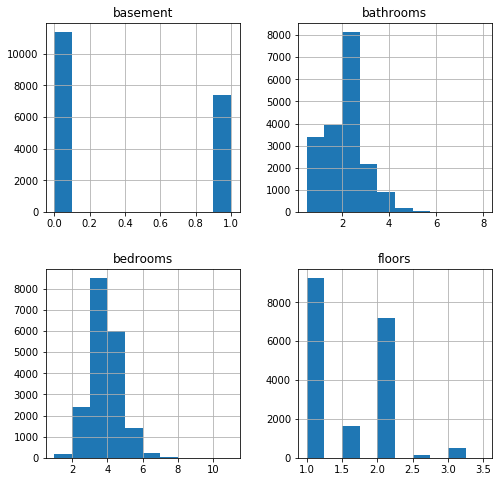

In [80]:
df[house_type].hist(figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016FCBF6F0F0>,
      dtype=object)

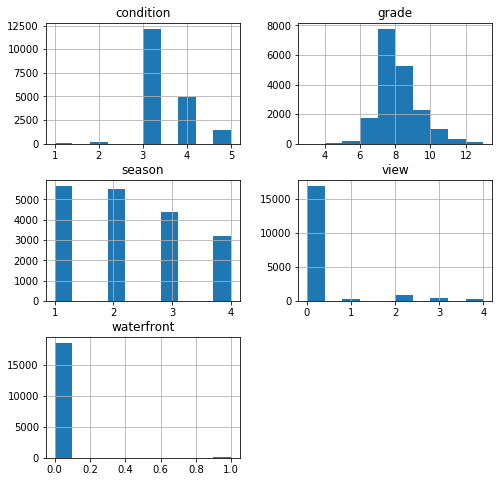

In [156]:
df[grading].hist(figsize=(8,8))

In [161]:
a = len(df.loc[df['waterfront']==1])
print('waterfront histogram looks like it only has 0 values, but if you look closer you can see some 1 values')
print('we only have '+str(a)+' waterfron properties in the data set, but I still want to keep the variable as one of the predictors')

waterfront histogram looks like it only has 0 values, but if you look closer you can see some 1 values
we only have 141 waterfron properties in the data set, but I still want to keep the variable as one of the predictors


#### **2.2 Scatter Plots**

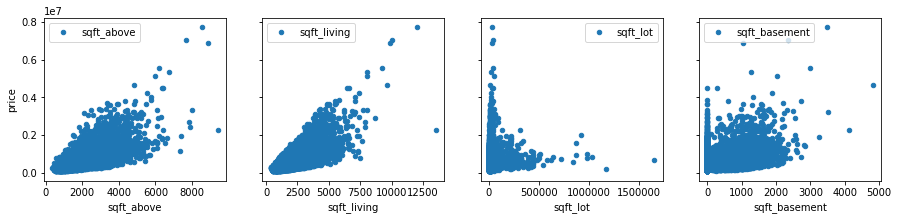

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 4, sharey=True, figsize=(15, 3))
for idx, predictor in enumerate(sizes):
    df.plot(kind='scatter', x=predictor, y='price', ax=axs[idx], label=predictor)
plt.legend()
plt.show()

Demonstrates that there's a more consistent tie between sqft_living and price than sqft_lot and price

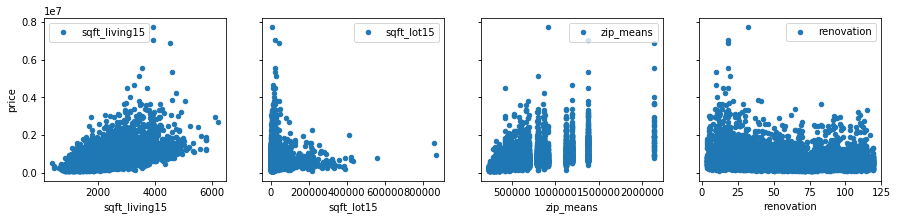

In [92]:
#adding a hue for a sale price or grading/condition
#use seaborn with hue argument

fig, axs = plt.subplots(1, 4, sharey=True, figsize=(15, 3))
for idx, predictor in enumerate(other_cont):
    df.plot(kind='scatter', x=predictor, y='price', ax=axs[idx], label=predictor)
plt.legend()
plt.show()

#### **2.3 Multicolinearity**

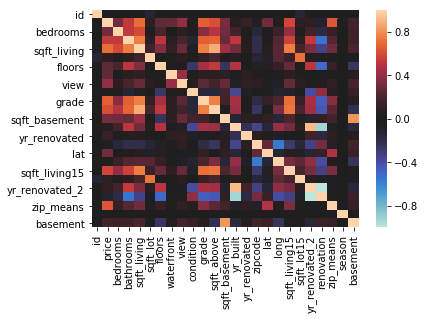

In [93]:
all_pred = df.columns
df_pred = df[all_pred]

import seaborn as sns
sns.heatmap(df_pred.corr(), center=0);

#### **2.4 Additional Clean Up**

* Sqft_X

    -I can see that measurements are a problem because they overlap with other variables like the count of bedrooms and bathrooms and each other, so I will exclude them from the list of predictors in my model
    
    -I want to get rid of sqft columns, but I don't want to lose the sense of size, there's a difference between a 1,000sqft 2-bedroom and 400sqft 2-bedroom so I will add a column for sqft_bed aka sqft_living per bedroom
    
    
* Other variables to remove:
    - lat, long : overlap with zip
    - id : I want to lose the sense of an individual house and assess them from the features perspective only; e.g. I want to treat the same property pre-renovation vs. post-renovation as completely different
    - sqft_lot15, sqft_living15: I'm not sure exactly what these are so I will exclude for now (area of future improvement)
    - yr_built, yr_renovated, yr_renovated_2 : will just keep "renovated" since it's the consolidated version
    - grade: overlaps with bathrooms and size, will keep conidtion instead which seems like a good proxy

In [152]:
df['sqft_bed'] = df['sqft_living']/df['bedrooms']


clean_df = df.drop(['grade', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'yr_renovated_2','lat', 'long', 'id', 'sqft_lot15','sqft_living15' ], axis=1)

outcome = 'price'

In [109]:
clean_df.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,zipcode,renovation,zip_means,season,neighborhood,basement,sqft_bed
1,12/9/2014,538000.0,3,2.25,2570,2.0,0.0,0.0,7,98125,28.0,464393.739496,4,9812,1.0,856.666667
2,2/25/2015,180000.0,2,1.00,770,1.0,0.0,0.0,6,98028,86.0,459067.800000,4,9802,0.0,385.000000
3,12/9/2014,604000.0,4,3.00,1960,1.0,0.0,0.0,7,98136,54.0,549230.468750,4,9813,1.0,490.000000
4,2/18/2015,510000.0,3,2.00,1680,1.0,0.0,0.0,8,98074,32.0,690835.244624,4,9807,0.0,560.000000
5,5/12/2014,1230000.0,4,4.50,5420,1.0,0.0,0.0,11,98053,18.0,671839.692958,1,9805,1.0,1355.000000


#### 2.5 Round 2 Visuals

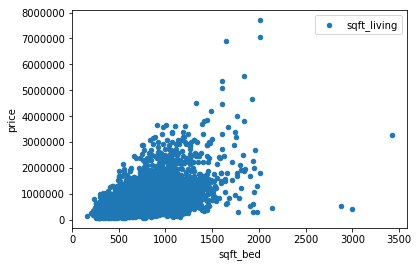

In [153]:
clean_df.plot(kind='scatter', x='sqft_bed', y='price', label='sqft_living')
plt.legend()
plt.show()

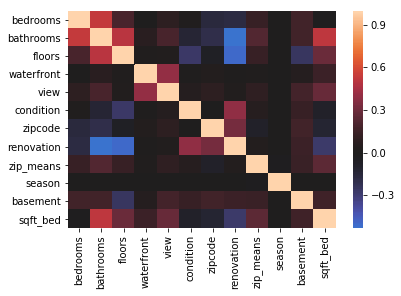

In [154]:
predictors = clean_df.drop('price', axis=1).columns
df_pred = clean_df[predictors]

import seaborn as sns
sns.heatmap(df_pred.corr(), center=0);

The above heat map is "colder" than the last one so it's good

## Step 3: Hypotheses

<intro bla bla bla>. I would like to confidently (p<0.05 and adj. R^2>0.8) answer the follwoing questions:
    1. What is the strongest indicator of the selling price of a house?
    2. Is waterfront real estate more expensive?
    3. Can I influence the selling price by choosing to sell during a specific time of the year?
    4. Should I renovate before selling?

## **Step 4: Model**

1. Pick out key variables
2. Scale variables (using log or something)
3. Create model using OLS and take a look at coefficients and fit

In [119]:
clean_df.head()

,date,price,bedrooms,bathrooms,floors,waterfront,view,grade,zipcode,renovation,zip_means,season,neighborhood,basement,sqft_bed
1,12/9/2014,538000.0,3,2.25,2.0,0.0,0.0,7,98125,28.0,464393.739496,4,9812,1.0,856.666667
2,2/25/2015,180000.0,2,1.00,1.0,0.0,0.0,6,98028,86.0,459067.800000,4,9802,0.0,385.000000
3,12/9/2014,604000.0,4,3.00,1.0,0.0,0.0,7,98136,54.0,549230.468750,4,9813,1.0,490.000000
4,2/18/2015,510000.0,3,2.00,1.0,0.0,0.0,8,98074,32.0,690835.244624,4,9807,0.0,560.000000
5,5/12/2014,1230000.0,4,4.50,1.0,0.0,0.0,11,98053,18.0,671839.692958,1,9805,1.0,1355.000000


In [120]:
import numpy as np #to scale variables
import statsmodels.api as sm
from statsmodels.formula.api import ols #to create model using OLS method

In [147]:
price = np.log(clean_df['price'])

#normalize
logsize = np.log(clean_df['sqft_bed'])
logren = np.log(clean_df['renovation']) #may have to turn these into grouped categorical

#scale
scaled_ren = (logren-min(logren))/(max(logren)-min(logren))
scaled_size = abs((logsize-min(logsize))/(max(logsize)-min(logsize)))

#neighborhood prices
logzipmeans = np.log(clean_df['zip_means'])

#make dummies for all non-continuous variables
model_data = pd.DataFrame([])
model_data["sqft_living"]= scaled_size
model_data["renovation"]= scaled_ren
model_data["waterfront"]= clean_df['waterfront']
model_data["view"]= clean_df['view']
#model_data["basement"]= clean_df['basement']
model_data['bathrooms'] =clean_df['bathrooms']
model_data['bedrooms'] =clean_df['bedrooms']
model_data['floors'] =clean_df['floors']
model_data['condition'] = clean_df['condition']
season_dummies = pd.get_dummies(clean_df['season'], prefix="season")

model_data = pd.concat([price, model_data, season_dummies, logzipmeans], axis=1) 

In [148]:
#regression itself
outcome = 'price'
predictors = model_data.drop('price' ,axis=1)

pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

model = ols(formula= formula, data = model_data).fit()
model.summary()

#model = ols(formula= formula, data=df).fit() #replace df by model_data when done scaling
#model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     6973.
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               0.00
Time:                        06:50:52   Log-Likelihood:                 1316.0
No. Observations:               18748   AIC:                            -2606.
Df Residuals:                   18735   BIC:                            -2504.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2626      0.045     28.324      0.000       1.175       1.350
sqft_living     1.7766      0.021     84.291      0.000       1.735       1.818
renovation      0.0376      0.010      3.706      0.000       0.018       0.057
waterfront      0.4149      0.021     19.862      0.000       0.374       0.456
view            0.0890      0.002     36.023      0.000       0.084       0.094
bathrooms       0.0459      0.004     12.024      0.000       0.038       0.053
bedrooms        0.1387      0.002     57.388      0.000       0.134       0.143
floors          0.0499      0.004     12.548      0.000       0.042       0.058
condition       0.0407      0.003     14.509      0.000       0.035       0.046
season_1        0.3499      0.011     30.502      0.000       0.327       0.372
season_2        0.3061      0.012     26.546      0.000       0.284       0.329
season_3        0.2964      0.012     25.643      0.000       0.274       0.319
season_4        0.3101      0.012     26.899      0.000       0.288       0.333
zip_means       0.7543      0.004    171.390      0.000       0.746       0.763
==============================================================================
Omnibus:                      517.852   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1319.866
Skew:                          -0.018   Prob(JB):                    2.48e-287
Kurtosis:                       4.299   Cond. No.                     8.55e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.23e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Step 5: Interpret the Output

* R-squared of 0.81 means we can have 81% confidence that our model will predict the price accurately
* Highest coefficient predictors are sqft_living, waterfront, and zip_means

In order to estimate the housing price we must start with finding out its size in terms of living sqft, whether or not it's a waterfront property, and the average prices in its 5-digit zipcode area. Seasonality of the sale, having a basement, and the last renovation/built date do not seem to have a strong impact on the price. 

Watch outs:
* low coefficient of renovation may be because of the zipcode layer - old houses also often tend to be located in expensive zipcodes; separating the two factors may allow us to revisit the importance of renovation
* Estimating a price is not as useful from business perspective as estimating price per sqft/bedroom/or any other unit of measure; further step in this EDA would be to try and take a look at all of the above with price per square feet as our dependent variable